# 12. 로지스틱 실습

김보람  
2023-06-07

> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

In [2]:
library(ISLR)

# Data

**Credit Card Default Data** :

A simulated data set containing information on ten thousand customers.
The aim here is to predict which customers will default on their credit
card debt.

-   **default** : A factor with levels No and Yes indicating whether the
    customer defaulted on their debt

-   **student** : A factor with levels No and Yes indicating whether the
    customer is a student

-   **balance** : The average balance that the customer has remaining on
    their credit card after making their monthly payment

-   **income** : Income of customer

In [3]:
head(Default)

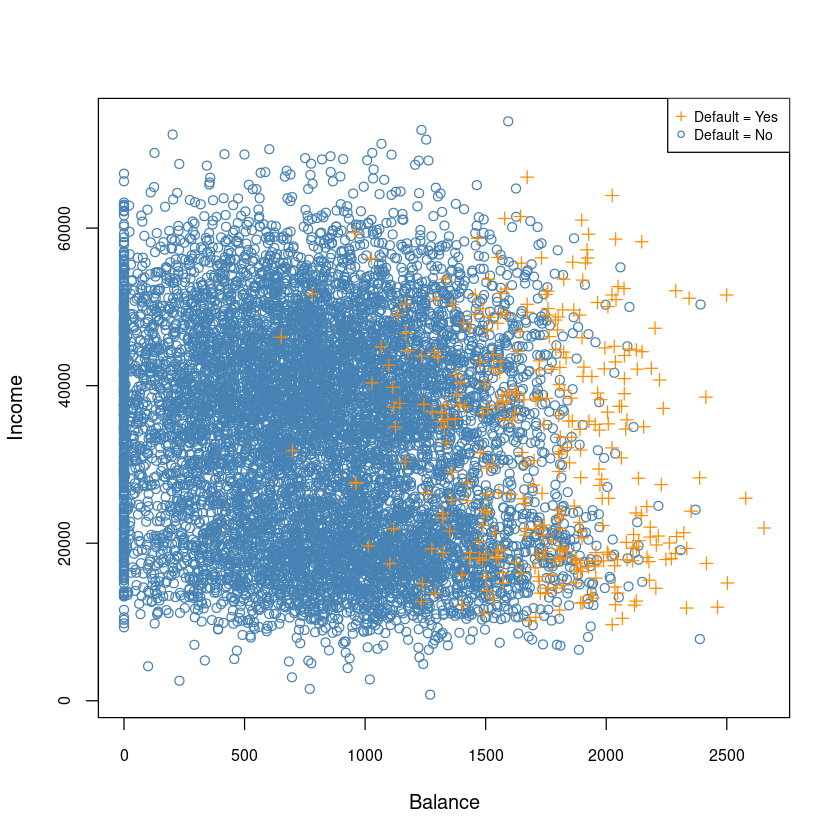

In [4]:
plot(Default$balance, Default$income,type='n',
    xlab='Balance',  
     ylab = 'Income',  
     cex.axis = 0.8)
points(Default[Default$default=='No',]$balance,
        Default[Default$default=='No',]$income,col='steelblue') 
points(Default[Default$default=='Yes',]$balance,
        Default[Default$default=='Yes',]$income,col='darkorange', pch=3)

legend("topright", c("Default = Yes", "Default = No"),
        col=c('darkorange', 'steelblue'),  
        pch = c(3,1),
        # bty = "n",
        cex=0.7)

-   Balance와 Income은 상관관계가 없어 보인다.

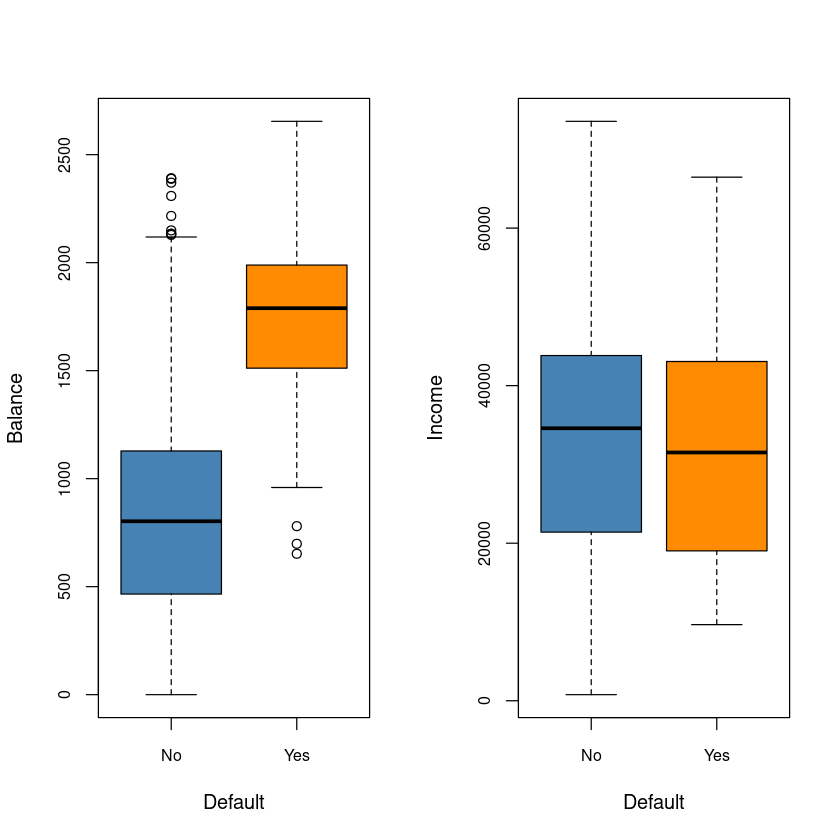

In [5]:
par(mfrow=c(1,2))
boxplot(balance~default, data=Default,cex.axis = 0.8,
           xlab = 'Default', ylab='Balance', col=c('steelblue', 'darkorange')) 
boxplot(income~default, data=Default,cex.axis = 0.8,
         xlab = 'Default', ylab='Income', col=c('steelblue', 'darkorange'))

-   income은 default와는 관계가 없어보인다.

# Logistic regression

-   ordinary linear model : $y = β_0 + β_1x + ϵ$

-   Logistic Regression model

$$ log \left( \dfrac{p(y=1|x)}{p(y=0|x)} \right) = log \left( \dfrac{p(x)}{1-p(x)} \right) = \beta_0 + \beta_1 x$$

`-` 단순선형회귀모형

In [7]:
lm.fits <- lm(as.numeric(default)-1 ~ balance,data = Default) 
summary(lm.fits)

-   y가 0 또는 1의 값인데 numeric으로 하면 1,2로 나와서 -1로 빼줌

-   모형 유의하지만 $R^2$값이 굉장히 작다.

`-` GLM(일반화 선형모형) 안에 있는 Logistic Regression

-   family=binomial 쓰면 logistic 회귀모형

In [8]:
glm.fits <- glm(default ~ balance,
                data = Default, family = binomial) # logistic regression
summary(glm.fits)

-   `Null deviance`: 설명변수가 없는것

-   `Residual deviance`: 설명변수가 있는것. 값이 크면 모형적합이 덜
    된것. 값이 작아야 모형적합이 잘 된 것!.

-   AIC는 작을수록 조흥ㅁ

-   `z value` = $\dfrac{\hat \beta_1}{s.e(\hat \beta_1)}$ ~H0 $N$

In [9]:
head(fitted(glm.fits))

-   $log \dfrac{p(x)}{1-p(x)}=\beta_0+\beta_1x$ : logit… link function

-   $p(x) = \dfrac{e^{\beta_0+\beta_1x}}{1+e^{\beta_0+\beta_1x}}$ =
    $P(y=1|x)$

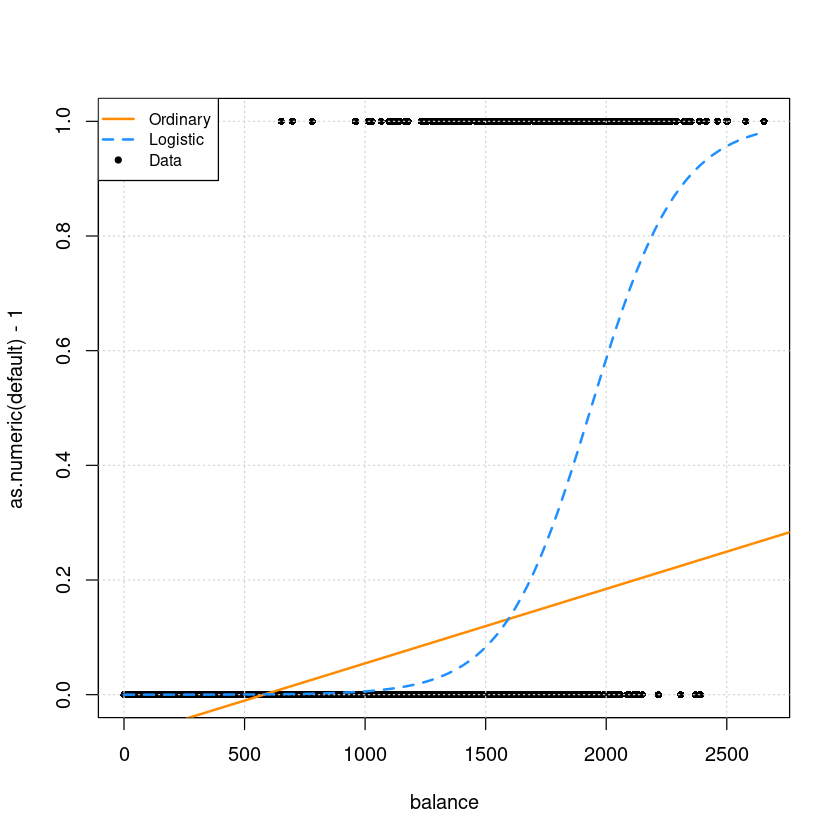

In [12]:
par(mfrow=c(1,1))
plot(as.numeric(default)-1 ~ balance,data = Default, pch=16, cex=0.8) 
grid()
abline(lm.fits, col='darkorange', lwd=2)
curve(predict(glm.fits,data.frame(balance=x), type = "response"), 
      add = TRUE, col = "dodgerblue", lty = 2, lwd=2)
legend("topleft", c("Ordinary", "Logistic", "Data"), lty = c(1, 2, 0),
        pch = c(NA, NA, 20), lwd = 2, col = c("darkorange", "dodgerblue", "black"), cex=0.8)

## Predict

In [13]:
predict(glm.fits, data.frame(balance=2000)) #type='link' : default

-   위의 값은 $log\dfrac{p(x)}{1-p(x)}$값

In [14]:
predict(glm.fits, data.frame(balance=2000), type='response') 

-   `type = 'response'` 해야 $p(x)$값을 구할 수 있음.

In [15]:
y_2000 <- predict(glm.fits, newdata = data.frame(balance=2000), type='response');y_2000

-   \$P(Default = “Yes” \| Balance = 2000) = 0.585769369615381 \$

In [16]:
y_1000 <- predict(glm.fits, newdata = data.frame(balance=1000), type='response');y_1000

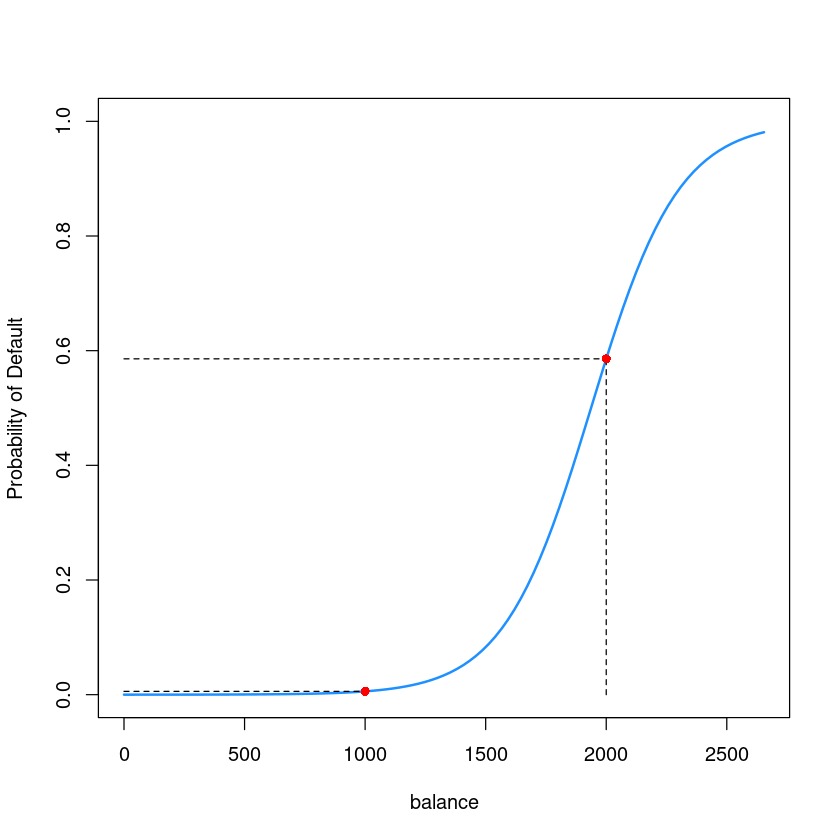

In [17]:
par(mfrow=c(1,1))
plot(as.numeric(default)-1 ~ balance,data = Default, 
     ylab = "Probability of Default" ,  
     pch=16, cex=0.8, type='n')

curve(predict(glm.fits,data.frame(balance=x), type = "response"), 
       add = TRUE, col = "dodgerblue", lwd=2)

lines(c(0, 2000),c(y_2000, y_2000), lty=2) 
lines(c(2000, 2000),c(0, y_2000), lty=2) 
points(2000, y_2000, col='red', cex=1, pch=16)

lines(c(0, 1000),c(y_1000, y_1000), lty=2) 
lines(c(1000, 1000),c(0, y_1000), lty=2) 
points(1000, y_1000, col='red', cex=1, pch=16)

## Confidence Interval

In [18]:
summary(glm.fits)

-   95% CI : $\hat \beta_1 \pm z_{0.025} s.e(\hat \beta_1)$

`-` 방법1

In [23]:
confint(glm.fits, level = 0.95)

Waiting for profiling to be done...


`-` 방법2

In [20]:
summary(glm.fits)$coef

In [21]:
summary(glm.fits)$coef[2,1] + qnorm(0.975)*summary(glm.fits)$coef[2,2]

In [22]:
summary(glm.fits)$coef[2,1] - qnorm(0.975)*summary(glm.fits)$coef[2,2]

## Classification

-   로지스틱은 분류모형에 해당

-   $P(y=1|x) > 0.5 \rightarrow$ Default $\hat y=1$

-   $P(y=1|x) \leq 0.5 \rightarrow$ Default $\hat y=0$

-   로 바꾸면 classification이 된다. 그럼 저렇게 0.5와 같은 기준값
    ($cut-off$)를 뭘로 정할까?

In [24]:
fitted.default.prob <- predict(glm.fits, type='response') 
head(fitted.default.prob)

In [25]:
class.default <- ifelse(fitted.default.prob > 0.5, 'Yes', "No") 
head(class.default)

In [26]:
table(Default$default, class.default)

-   왼쪽이 실제!

-   정분류율은 0.9725

In [27]:
class.default <- ifelse(fitted.default.prob > 0.3, 'Yes', "No") 
head(class.default)

In [28]:
table(Default$default, class.default)